# <center> How to apply TICOI on one pixel of a cube stored on the ITS_LIVE Amazon S3 Cloud ? </center>

For this demonstration, we are going to use the test data available on the git repository.
But you can modify it to use your one dataset!

In [1]:
import os
from ticoi.core import ticoi_one_pixel
from ticoi.utils import find_granule_by_point

#### 1) Here are the demo specific variables that you should modify for your one dataset:

In [2]:
i, j = -140.84746241412898, 60.08936753843976
pick_dates = ["2015-01-01", "2024-01-01"]# date range to study

#### 2) Then, let's define the main TICOI parameters

- Processing parameters

In [3]:
coef = 500  # Regularization coefficient to be used
delete_outliers = {"median_angle": 45} #Remove the observation if its direction is 45° away from the direction of the median vector

- Visualization parameters

In [4]:
save = False  # Save the results and figures
path_save = f'To_fill_if_save_if_True'# path where to save our results
show = True  # Plot some figures
option_visual = ["obs_magnitude", "invertvv", "inverpvv", "quality_metrics"] #check README_visualization_pixel_output to see the different options .
result_quality = [
    "X_contribution",
]  # Criterium used to evaluate the quality of the results: ("Error_propagation": the initial error given in the dataset is propagated through the inversion; "X_contribution" correspond to the number of observed velocity used to estimate each estimated value

#### 4) Now, we can automatically look for the url of the cube, in the ITS_LIVE catalog

In [5]:
url_ls = find_granule_by_point([i, j])

In [6]:
if save and not os.path.exists(path_save):
    os.mkdir(path_save)

#### 5) To finish, we just have to run ticoi on our pixel!

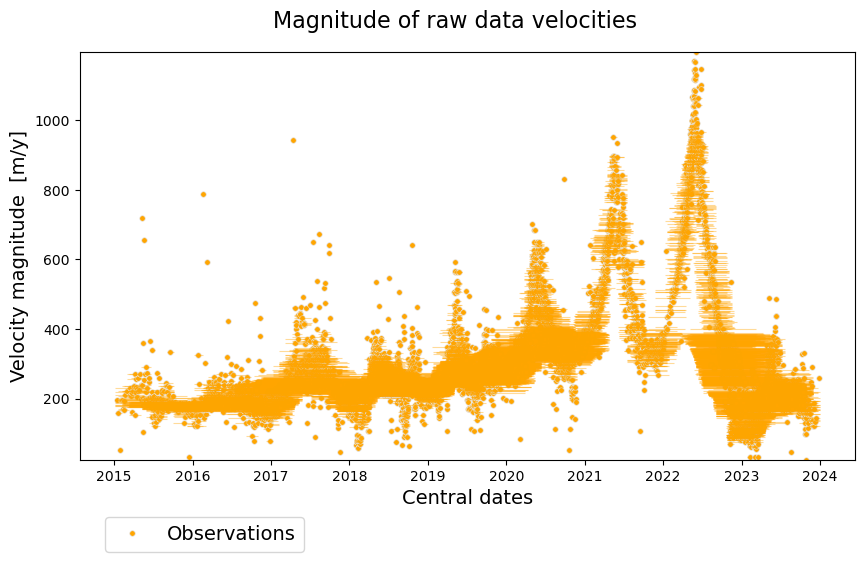

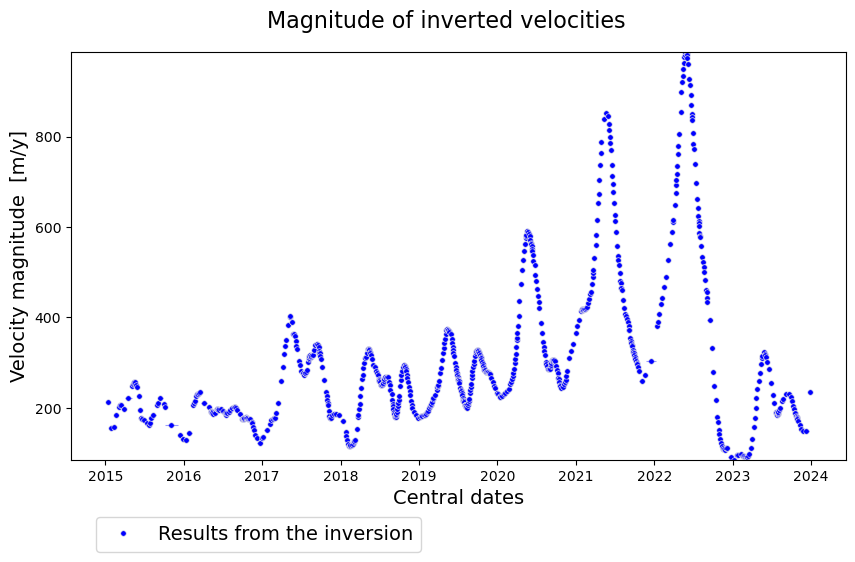

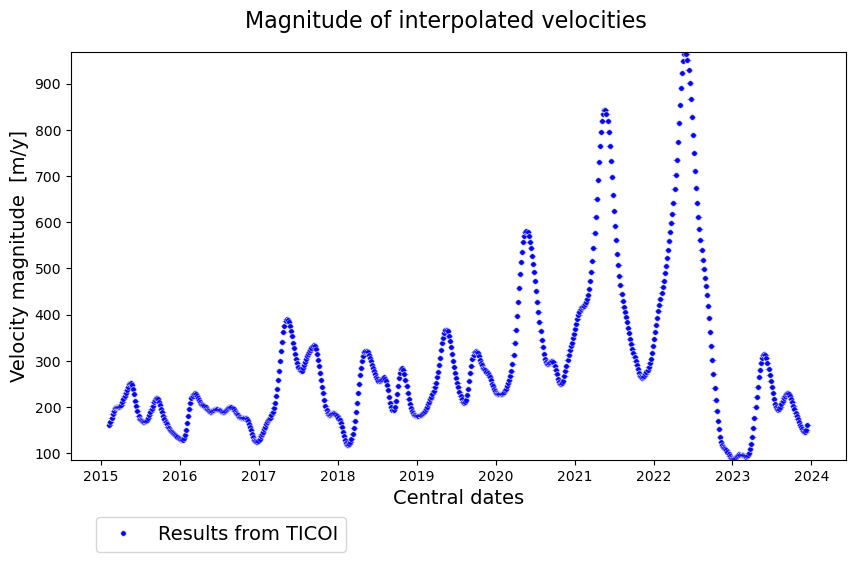

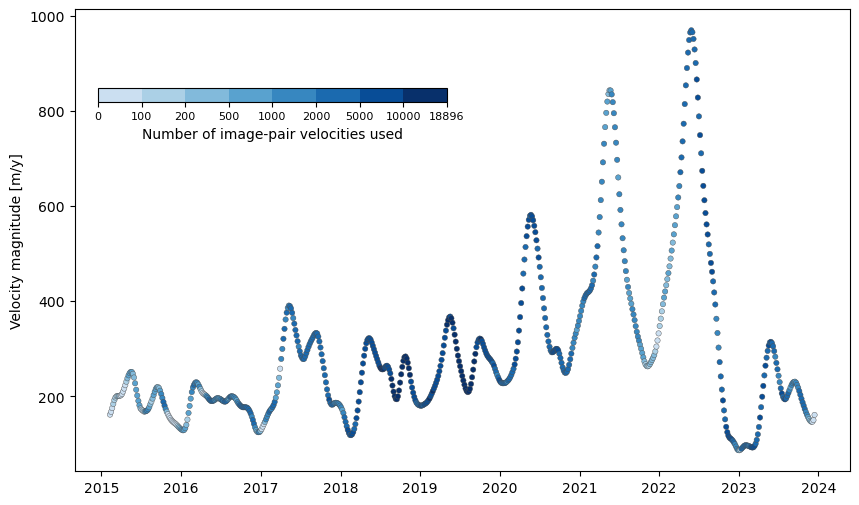

In [7]:
data,dataf,dataf_lp = ticoi_one_pixel(cube_name=url_ls,i=i,j=j,save=save,path_save=path_save,show=show,option_visual=option_visual,load_kwargs={"pick_date":pick_dates,"buffer": [i, j, 0.01],"chunks": {}},load_pixel_kwargs={"visual":show},preData_kwargs={"delete_outliers":delete_outliers},inversion_kwargs = {"coef":coef,"result_quality":result_quality,"visual":show},interpolation_kwargs = {"result_quality":result_quality})